In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/sample_data/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2020-06-11 10:22:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/sample_data/cats_and_dogs_filtered.zip’

/content/sample_dat 100%[===================>]  65.43M  85.2MB/s    in 0.8s    

2020-06-11 10:22:10 (85.2 MB/s) - ‘/content/sample_data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



We use subset of cats Vs dogs dataset having train(cats-1000,dogs-1000) and validation(cats-500,dogs-500)

In [0]:
local_zip = '/content/sample_data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [0]:
base_dir = '/content/sample_data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/train/cats/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/train/dogs/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/validation/cats/')))
print(len(os.listdir('/content/sample_data/cats_and_dogs_filtered/validation/dogs/')))

1000
1000
500
500


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [6]:
TRAINING_DIR = '/content/sample_data/cats_and_dogs_filtered/train'
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/content/sample_data/cats_and_dogs_filtered/validation'
validation_datagen = ImageDataGenerator(rescale=1/255)

# VALIDATION GENERATOR.
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/50
63/63 [==============================] - 20s 319ms/step - loss: 0.7051 - acc: 0.5450 - val_loss: 0.6778 - val_acc: 0.6590
Epoch 2/50
63/63 [==============================] - 20s 315ms/step - loss: 0.6852 - acc: 0.5925 - val_loss: 0.6388 - val_acc: 0.6780
Epoch 3/50
63/63 [==============================] - 20s 320ms/step - loss: 0.6508 - acc: 0.6285 - val_loss: 0.6212 - val_acc: 0.6630
Epoch 4/50
63/63 [==============================] - 20s 318ms/step - loss: 0.6416 - acc: 0.6325 - val_loss: 0.6022 - val_acc: 0.6650
Epoch 5/50
63/63 [==============================] - 20s 317ms/step - loss: 0.6196 - acc: 0.6675 - val_loss: 0.6044 - val_acc: 0.6650
Epoch 6/50
63/63 [==============================] - 20s 318ms/step - loss: 0.6100 - acc: 0.6655 - val_loss: 0.5904 - val_acc: 0.6820
Epoch 7/50
63/63 [==============================] - 20s 317ms/step - loss: 0.6129 - acc: 0.6655 - val_loss: 0.7346 - val_acc: 0.5440
Epoch 8/50
63/63 [==============================] - 20s 317ms/step - 

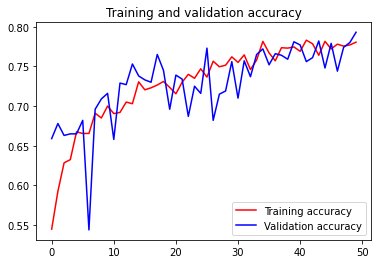

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


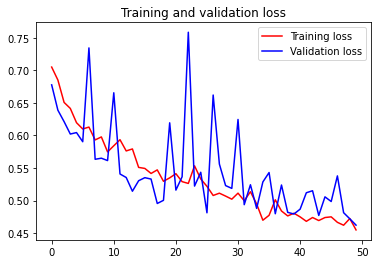

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()